# Read stack of dm3 image files

This notebook reads a stack of **.dm3** microscopy images for analysis.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

# this is the library for reading the dm3 files
# install this using 'pip install ncempy'
from ncempy.io import dm

# these are custom methods in a .py file in the same directory
import microscopy_methods as mm

### Identify the image stack file

In [2]:
# identify the image stack filename
stack_filename = 'stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3'

# get full path of the image stack file
stack_path = os.path.join(os.getcwd(), stack_filename)

### Read the file

In [3]:
# read stack data
d = mm.read_stack(stack_path)

# examine the data
for key in d:
    print('{}: {}'.format(key, d[key]))

filename: stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3
data: [[[1127 1197 1230 ... 1749 1662 1651]
  [ 996 1095 1164 ... 1703 1642 1661]
  [1134 1127 1158 ... 1741 1708 1618]
  ...
  [1565 1786 1770 ... 1676 1726 1721]
  [1688 1869 1777 ... 1764 1722 1838]
  [1707 1824 1660 ... 1717 1684 1750]]

 [[1136 1067 1289 ... 1691 1762 1698]
  [1096 1118 1231 ... 1725 1463 1549]
  [1193 1234 1206 ... 1656 1557 1513]
  ...
  [1491 1498 1473 ... 1570 1616 1491]
  [1534 1564 1524 ... 1711 1560 1491]
  [1711 1654 1567 ... 1658 1547 1483]]

 [[1570 1553 1651 ... 1602 1679 1633]
  [1815 1645 1679 ... 1653 1737 1750]
  [1781 1682 1705 ... 1722 1694 1741]
  ...
  [1796 1693 1608 ... 1449 1411 1465]
  [1792 1680 1564 ... 1604 1426 1316]
  [1604 1591 1493 ... 1616 1546 1515]]

 ...

 [[1377 1533 1604 ... 1407 1474 1680]
  [1309 1381 1454 ... 1410 1435 1597]
  [1273 1295 1311 ... 1567 1580 1556]
  ...
  [1425 1528 1531 ... 1689 1647 1635]
  [1512 1721 1587 ... 1538 1660 1677]
  [1642 1721 

### Create sliding window for image analysis

In [4]:
# set size in pixels of sliding window to sample and oversample
samples = 15
oversamples = 50

# get index slices for sampled and oversampled windows
img = d['data'][0,:,:]
slices = mm.get_window_slices(img, samples, oversamples)
print('Created {} sampling windows across {} pixel image'.format(
    len(slices['s']), img.shape))

Created 18769 sampling windows across (2048, 2048) pixel image


### Apply sliding window for image analysis

C:\Users\Eric\Documents\GitHub\microscopy_analysis\microscopy_methods.py:77: RuntimeWarning: divide by zero encountered in true_divide
  grad_phase = np.mean(np.arctan(grad_y/grad_x))
C:\Users\Eric\Documents\GitHub\microscopy_analysis\microscopy_methods.py:77: RuntimeWarning: invalid value encountered in true_divide
  grad_phase = np.mean(np.arctan(grad_y/grad_x))


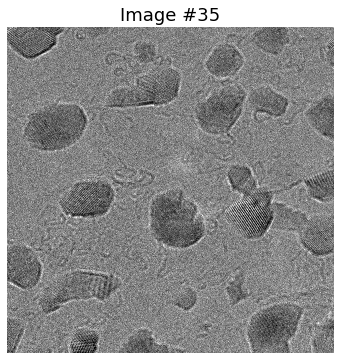

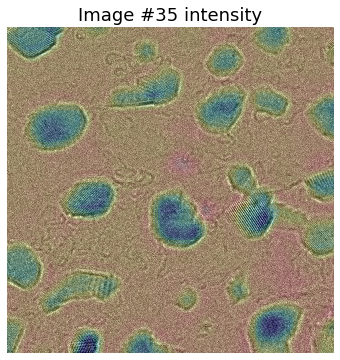

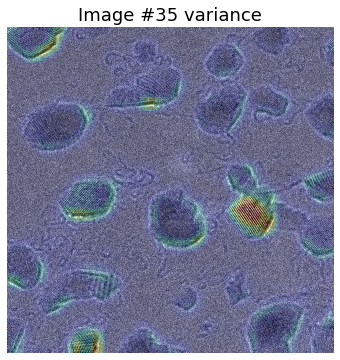

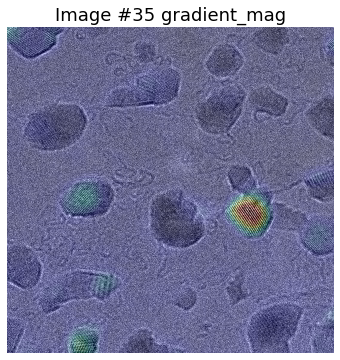

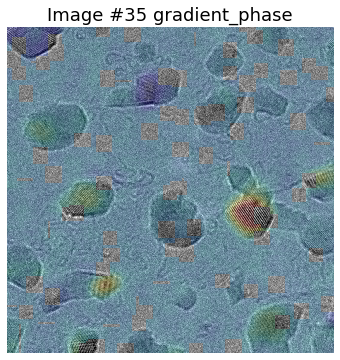

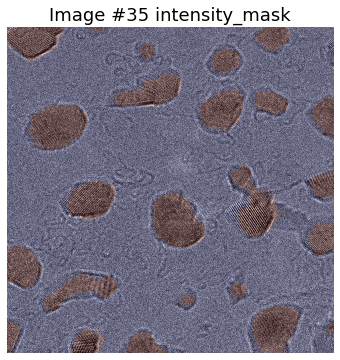

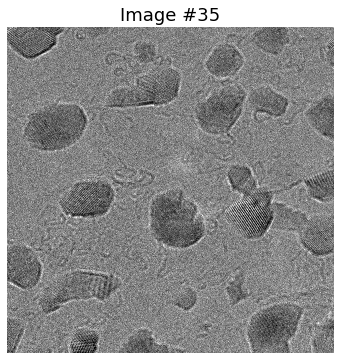

In [5]:
# loop over specified images in the image stack
for i in range(35, d['data'].shape[0], 12):
    
    # selet the image and normalize its intensity from 0 to 1
    img = d['data'][i, :, :]
    img = mm.norm_image(img)

    # create dictionary of calculated image layers to overlay on original image
    layers = mm.map_image(img, slices)
    
    # plot the raw image
    plt.imshow(img, origin='lower', cmap='gray')
    mm.plot_setup(title='Image #{}'.format(i), axes_on=False)
    plt.show()
    
    for lay in layers:
        plt.imshow(img, origin='lower', cmap='gray')
        plt.imshow(layers[lay], origin='lower', cmap='jet', alpha=0.2)
        mm.plot_setup(title='Image #{} {}'.format(i, lay), axes_on=False)
        plt.show()
    
    # plot the raw image
    plt.imshow(img, origin='lower', cmap='gray')
    mm.plot_setup(title='Image #{}'.format(i), axes_on=False)
    plt.show()

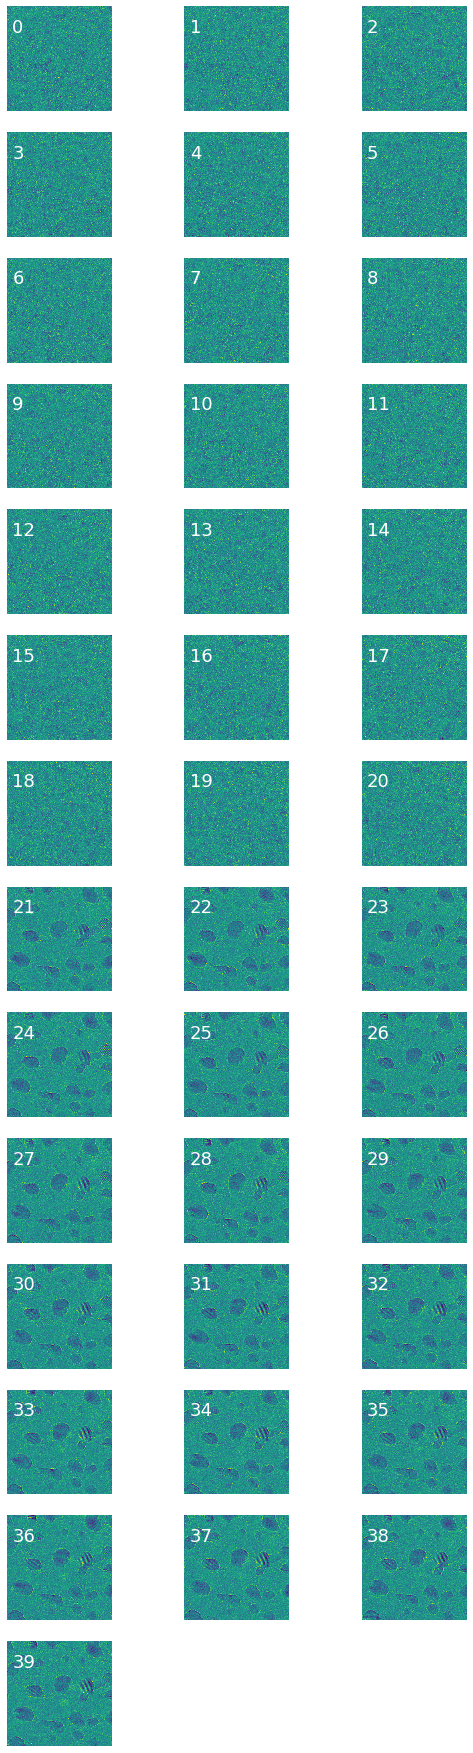

"\nfor i in range(d['data'].shape[0]):\n    plt.imshow(mm.norm_image(d['data'][i, :, :]))\n    plt.title(str(i))\n    plt.show()\n"

In [7]:
columns = 3
rows = int(np.ceil(d['data'].shape[0]/columns))

for i in range(d['data'].shape[0]):
    ax = plt.subplot(rows, columns, i+1)
    #ax.set_title()
    ax.axis(False)
    ax.imshow(mm.norm_image(d['data'][i,:,:]), origin='')
    ax.text(100, 500, str(i), color='w', fontsize=18)
fig = plt.gcf()
fig.set_size_inches((9, 32))
plt.show()

'''
for i in range(d['data'].shape[0]):
    plt.imshow(mm.norm_image(d['data'][i, :, :]))
    plt.title(str(i))
    plt.show()
'''

In [ ]:
'''
from sklearn.decomposition import PCA
# Make an instance of the Model

# plot original image
plt.imshow(img, origin='lower')
plt.show()



img0 = d['data'][0,:,:]
img1 = d['data'][21,:,:]
img2 = d['data'][-1,:,:]

imgs = [img0, img1, img2]


for idx, i in enumerate(imgs):
    
    # run PCA on 
    pca = PCA(n_components=0.6)
    pca.fit(mm.norm_image(i))
    components = pca.transform(mm.norm_image(i))
    projected = pca.inverse_transform(components)
    plt.title(str(idx))
    plt.imshow(projected, origin='lower')
    plt.show()
'''

In [ ]:
components.shape

In [ ]:
#blobs = blob_dog(1-img, min_sigma=100, max_sigma=300, threshold=.1)

In [ ]:
'''
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.imshow(img)

for blob in blobs:
    y, x, r = blob
    
    #r *= np.sqrt(2)
    
    c = plt.Circle((x, y), r, linewidth=1, fill=False)
    ax.add_patch(c)
    plt.text(x, y, str(int(r)))

mm.plot_setup()
plt.show()

print(len(blobs))
'''

In [ ]:
'''
edges = cv2.Canny(img.astype('uint8'), 0, .01)
print(np.any(edges))
print(len(np.where(edges==255)[0]))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis(False)

plt.subplot(122)
plt.imshow(edges)#, cmap='gray')
plt.title('Edge Image')
plt.axis(False)
plt.show()
'''

In [ ]:
'''
from skimage.feature import canny
canny_edges = canny(
    img,
    sigma=0.7,
    low_threshold=0.1,
    high_threshold=0.7)

plt.imshow(canny_edges, origin='lower')

plt.show()


print(np.any(canny_edges))
'''

In [ ]:
'''
grad_mag = np.hypot(grad_x, grad_y)

plt.imshow(grad_mag, cmap='jet')#, vmin=grad_mag.min(), vmax=grad_mag.max())
plt.colorbar()
plt.plot()
'''